## Aufbereitung German Credit Datensatz  
Dieses Notebook dient dazu, den [Statlog (German Credit Data)](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)
Datensatz aus der UCI Machine Learning Repository in eine menschenlesbare Form zu überführen.

In diesem Notebook ist der Quellcode beschrieben, der angewandt wurde, um den German Credit Datensatz lesbar zu decodieren. Für das Training das ANNs ist diese Decodierung nicht nötig, aber sie ist meines Erachtens sehr hilfreich, um den geneigten Leser:innen einen Einblick in den Datensatz zu geben und die ganze Analyse anschaulicher zu gestalten. 

### Datensatz
Der Datensatz enthält:
- 20 Variablen zu Kundenmerkmalen
- 1 Zielvariable (Kreditentscheidung)
- numerische und kategorische Merkmale

### Schritt 1: Einlesen des Originaldatensatzes

Im ersten Schritt wird mit der Variable `data_path` der **Pfad zum Originaldatensatz** festgelegt.  
Anschließend wird der Datensatz eingelesen und eine **Vorschau der ersten 15 Zeilen** angezeigt.

Wie in der Vorschau zu erkennen ist, sind die **numerischen Variablen** als Ganzzahlen (`int`) codiert,  
während die **kategorischen Variablen** mit Kürzeln wie `A11`–`Axx` dargestellt werden.

Diese Kürzel stehen jeweils für bestimmte Ausprägungen, z. B. Kreditart, Beruf oder Zweck des Kredits,  
und werden im nächsten Schritt in verständliche Bezeichnungen decodiert.


In [1]:
import pandas as pd

# Pfad zur Datensatzdatei
data_path = "C:/Users/JonasNiehus/Documents/Masterarbeit/Evaluation/Datensatz/german.data"

# Einlesen des Datensatzes
df = pd.read_csv(data_path, header=None, sep=r'\s+')

# Vorschau der ersten 15 Zeilen des Originaldatensatzes ohne Spaltennamen
df.head(15)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


### Schritt 2

Nachdem der originale Datensatz eingebunden wurde, werden mit `df.columns` für alle **20 Variablen** der Profile sowie der **Zielvariable** verständliche Spaltennamen gesetzt.

Anschließend erfolgt die **Decodierung der kategorischen Variablen**, die im Originaldatensatz mit Kürzeln wie `A11`–`Axx` codiert sind.  
Hierfür wird in einem Python-Dictionary `category_mappings` eine Zuordnung definiert, die jede kodierte Ausprägung wieder in eine **semantisch lesbare Bezeichnung** überführt.

Beispielsweise:
```python
category_mappings = {
    "purpose": {
        "A40": "Auto (neu)",
        "A41": "Auto (gebraucht)",
        "A42": "Möbel / Ausstattung",
        ...
    }
}
 

In [2]:
# Einbinden der benötigten Bibliotheken
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Pfad zur Datensatzdatei
data_path = 'C:/Users/JonasNiehus/Documents/Masterarbeit/Evaluation/Datensatz/german.data'

# Einlesen des Datensatzes
df = pd.read_csv(data_path, header=None, sep=r'\s+')

# Spaltennamen setzen (21 Spalten)
df.columns = [
    "Status_des_Girokontos", "Dauer_in_Monaten", "Kreditgeschichte", "Kreditverwendungszweck",
    "Kreditbetrag", "Sparkonto_Wertpapiere", "Beschäftigt_seit", "Ratenhöhe",
    "Familienstand_Geschlecht", "Weitere_Bürgen_Schuldner", "Wohnsitzdauer", "Vermögen", "Alter",
    "Andere_Ratenverpflichtungen",  "Wohnsituation", "Anzahl_bestehender_Kredite", "Beruf",
    "Unterhaltspflichtige_Personen", "Telefon", "Ausländischer_Arbeiter", "Ziel"
]

# Maximalbreite für jede Spalte erhöhen 
pd.set_option('display.max_colwidth', 200)

# Maximale Anzahl der anzuzeigenden Spalten erhöhen
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 1000)
# Kategoriewerte für jede Spalte definieren
category_mappings = {
  "Status_des_Girokontos": {
        "A11": "... < 0 DM",
        "A12": "0 <= ... < 200 DM",
        "A13": "... >= 200 DM / Gehaltspfändung mindestens 1 Jahr",
        "A14": "kein Girokonto"
    },

    "Dauer_in_Monaten": {},  # numerisch, daher keine Umkodierung erforderlich

    "Kreditgeschichte": {
        "A30": "keine Kredite aufgenommen / alle Kredite wurden ordnungsgemäß zurückgezahlt",
        "A31": "alle Kredite bei dieser Bank wurden ordnungsgemäß zurückgezahlt",
        "A32": "bestehende Kredite wurden bisher ordnungsgemäß zurückgezahlt",
        "A33": "Verzögerungen bei der Rückzahlung in der Vergangenheit",
        "A34": "kritisches Konto / andere Kredite bestehen (nicht bei dieser Bank)"
    },
    "Kreditverwendungszweck": {
        "A40": "Auto (neu)",
        "A41": "Auto (gebraucht)",
        "A42": "Möbel/Ausstattung",
        "A43": "Radio/TV",
        "A44": "Haushaltsgeräte",
        "A45": "Reparaturen",
        "A46": "Ausbildung",
        "A47": "Urlaub (existiert nicht?)",
        "A48": "Umschulung",
        "A49": "Geschäft",
        "A410": "Sonstiges"
    },
    "Kreditbetrag": {},  # numerisch, daher keine Umkodierung erforderlich

    "Sparkonto_Wertpapiere": {
        "A61": "... < 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ".. >= 1000 DM",
        "A65": "unbekannt/kein Sparkonto"
    },
    "Beschäftigt_seit": {
        "A71": "arbeitslos",
        "A72": "... < 1 Jahr",
        "A73": "1 <= ... < 4 Jahre",
        "A74": "4 <= ... < 7 Jahre",
        "A75": ".. >= 7 Jahre"
    },
    "Ratenhöhe": {},  # numerisch, daher keine Umkodierung erforderlich

    "Familienstand_Geschlecht": {
        "A91": "männlich : geschieden/getrennt",
        "A92": "weiblich : geschieden/getrennt/verheiratet",
        "A93": "männlich : ledig",
        "A94": "männlich : verheiratet/witwer",
        "A95": "weiblich : ledig"
    },

    "Weitere_Bürgen_Schuldner": {
        "A101": "keine",
        "A102": "Mit-Antragsteller",
        "A103": "Bürge"
    },
    "Wohnsitzdauer": {},  # numerisch, daher keine Umkodierung erforderlich
    "Vermögen": {
        "A121": "Immobilie",
        "A122": "wenn nicht A121: Bausparvertrag/Lebensversicherung",
        "A123": "wenn nicht A121/A122: Auto oder anderes, nicht in Attribut 6",
        "A124": "unbekannt/kein Eigentum"
    },
    "Alter": {},  # numerisch, daher keine Umkodierung erforderlich
    "Andere_Ratenverpflichtungen": {
        "A141": "Bank",
        "A142": "bei Händlern / Geschäften",
        "A143": "Keine"
    },
    "Wohnsituation": {
        "A151": "Miete",
        "A152": "Eigentum",
        "A153": "kostenlos"
    },
    "Anzahl_bestehender_Kredite": {},  # numerisch, daher keine Umkodierung erforderlich
    "Beruf": {
        "A171": "arbeitslos/ungelernt - nicht ansässig",
        "A172": "ungelernt - ansässig",
        "A173": "gelernt - Angestellter/Beamter",
        "A174": "Management/selbstständig/hochqualifizierter Angestellter/Beamter"
    },
    "Unterhaltspflichtige_Personen": {},  # numerisch, daher keine Umkodierung erforderlich
    "Telefon": {
        "A191": "kein Telefon",
        "A192": "ja, unter dem Namen des Kunden registriert"
    },
    "Ausländischer_Arbeiter": {
        "A201": "ja",
        "A202": "nein"
    }

}

# Spalten mit kategorialen Variablen umkodieren
for column, mapping in category_mappings.items():
    if mapping:  # nur wenn das Mapping existiert
        df[column] = df[column].map(mapping)

# Zielvariable umkodieren: 1 = guter Kredit, 2 = schlechter Kredit
df['Ziel'] = df['Ziel'].map({1: "guter Kredit", 2: "schlechter Kredit"})

# Pfad zum Speichern der CSV-Datei
output_path = 'C:/Users/JonasNiehus/Documents/Masterarbeit/Evaluation/Datensatz/german_readable.csv'

# Speichern des umkodierten DataFrames als CSV-Datei
df.to_csv(output_path, index=False)

print(f"Datensatz wurde erfolgreich gespeichert unter: {output_path}")


Datensatz wurde erfolgreich gespeichert unter: C:/Users/JonasNiehus/Documents/Masterarbeit/Evaluation/Datensatz/german_readable.csv


### Plot & Visualisierung 
Zur Veranschaulichung sind hier noch zwei Plots ergänzt. 


C:\Users\JonasNiehus\AppData\Local\Temp\ipykernel_11156\4109905801.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ziel", data=df, palette="Set2")


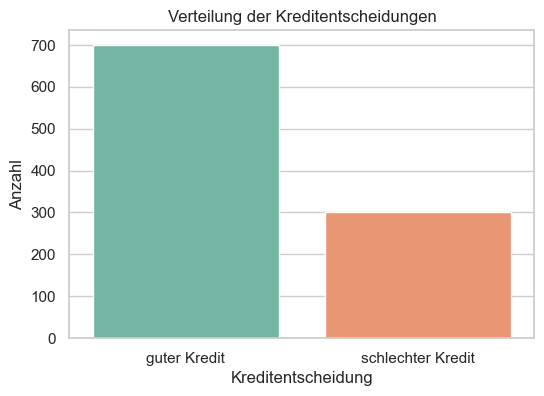

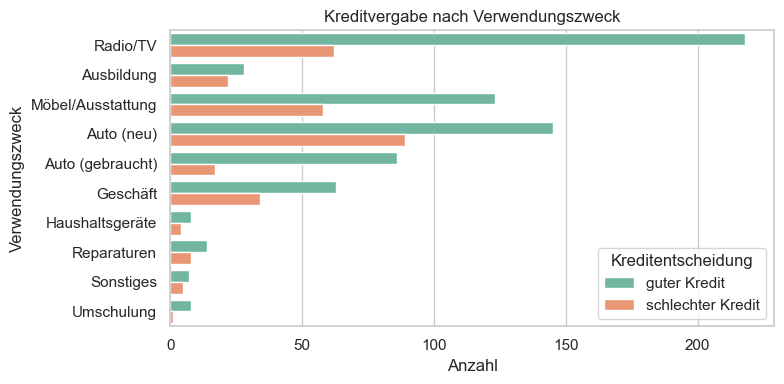

In [3]:
# --- Visuelle Darstellung des decodierten German Credit Datensatzes ---
df = pd.read_csv("C:/Users/JonasNiehus/Documents/Masterarbeit/Evaluation/Datensatz/german_readable.csv")

import matplotlib.pyplot as plt
import seaborn as sns

# Stil anpassen (für Masterarbeit/GitHub)
sns.set(style="whitegrid", context="notebook")

# Verteilung der Kreditentscheidungen
plt.figure(figsize=(6, 4))
sns.countplot(x="Ziel", data=df, palette="Set2")
plt.title("Verteilung der Kreditentscheidungen")
plt.xlabel("Kreditentscheidung")
plt.ylabel("Anzahl")
plt.show()

# Beispiel für eine kategoriale Variable (z. B. Zweck des Kredits)
if "Kreditverwendungszweck" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y="Kreditverwendungszweck", data=df, hue="Ziel", palette="Set2")
    plt.title("Kreditvergabe nach Verwendungszweck")
    plt.xlabel("Anzahl")
    plt.ylabel("Verwendungszweck")
    plt.legend(title="Kreditentscheidung")
    plt.tight_layout()
    plt.show()
